<a href="https://colab.research.google.com/github/jsedoc/ConceptorDebias/blob/master/BERT_save_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup BERT

In [1]:
!pip install flair

    100% |████████████████████████████████| 81kB 3.2MB/s 
    100% |████████████████████████████████| 798kB 11.2MB/s 
    100% |████████████████████████████████| 122kB 32.4MB/s 
    100% |████████████████████████████████| 1.0MB 18.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/70/55/6b/c12cf58209b8346f653a04f37dd8f607ab0e85a26238a23420
  Stored in directory: /root/.cache/pip/wheels/15/ee/a8/6112173f1386d33eebedb3f73429cfa41a4c3084556bcee254
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Stored in directory: /root/.cache/pip/wheels/bd/57/d3/907c3ee02d35e66f674ad0106e61f06eeeb98f6ee66a6cc3fe
Successfully built flair segtok mpld3 sqlitedict


In [1]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence


# init embedding
embedding = BertEmbeddings('bert-large-uncased')

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import numpy as np
import torch
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

# Get Brown Corpus

In [3]:
from tqdm import tqdm

import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()

[nltk_data] Downloading package brown to /home/jsedoc/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [4]:
brown_e = []
for s in tqdm(brown_corpus):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)

100%|██████████| 57340/57340 [53:40<00:00, 17.80it/s]  


In [5]:
import numpy as np
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [7]:
def do_plot(X_fit, title=None, labels=['']):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    print(X_fit.shape, label_types, num_labels, colors)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab, col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i, 0] for i in idxs],
                               [X_fit[i, 1] for i in idxs],
                               c=col, label=lab)
                else:
                    ax.scatter(X_fit[:, 0],
                               X_fit[:, 1],
                               c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        if num_labels>1:
            ax.legend()
        plt.show()

In [8]:
def pick_embeddings(corpus, sent_embs, word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

In [9]:
#brown_corpus = brown_corpus[:20000]
brown_embs = brown_e

(805, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:40,633 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:40,640 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:40,646 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D arra

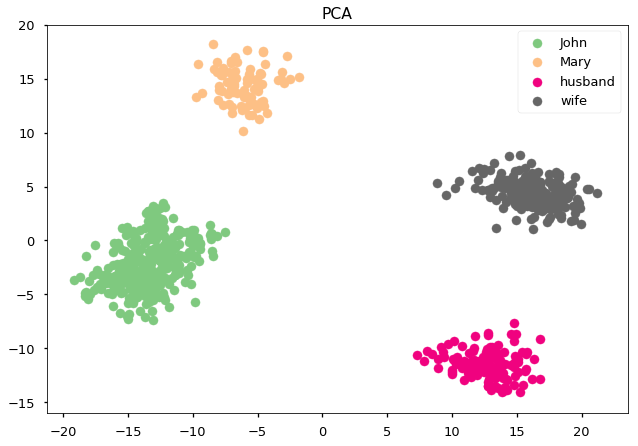

(1368, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:43,522 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:43,532 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


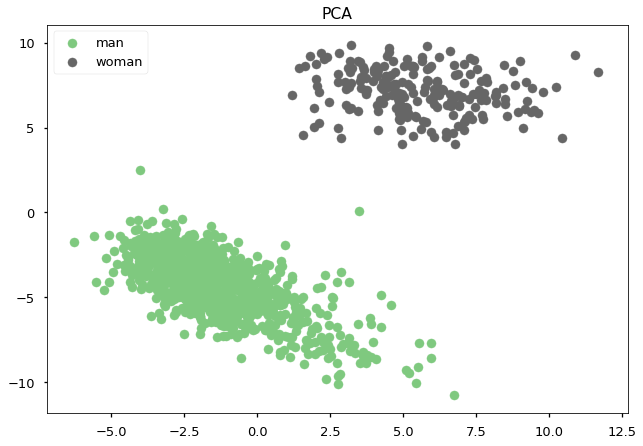

(724, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:46,186 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:46,193 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


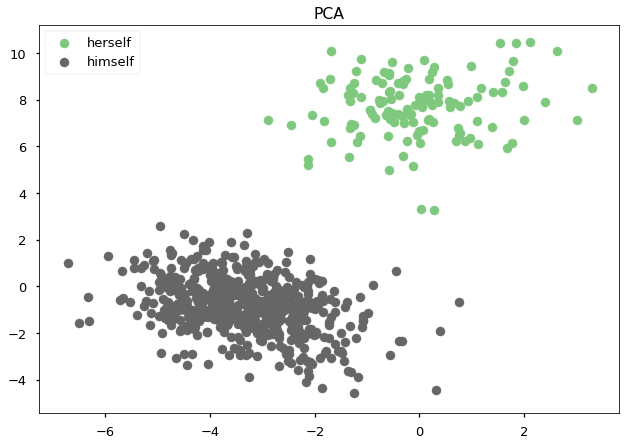

(446, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:48,808 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:48,814 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


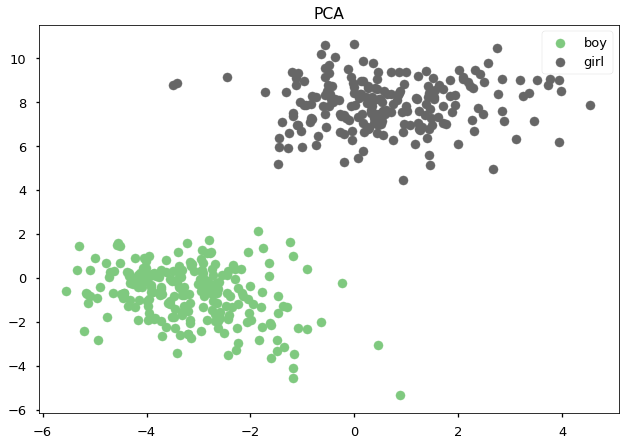

(447, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:51,430 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:51,436 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


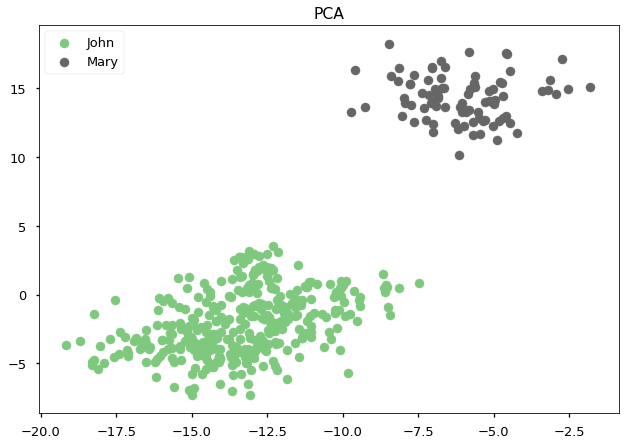

(358, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:54,136 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:54,141 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


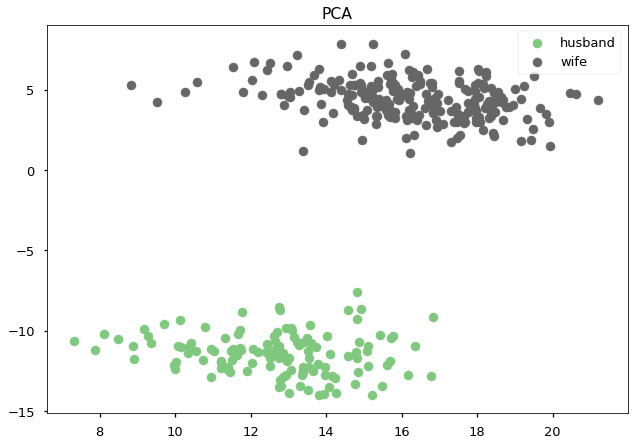

(145, 2) ['Bonnie', 'David', 'Lauren', 'Robert'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-05 01:42:56,725 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:56,729 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-05 01:42:56,732 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D 

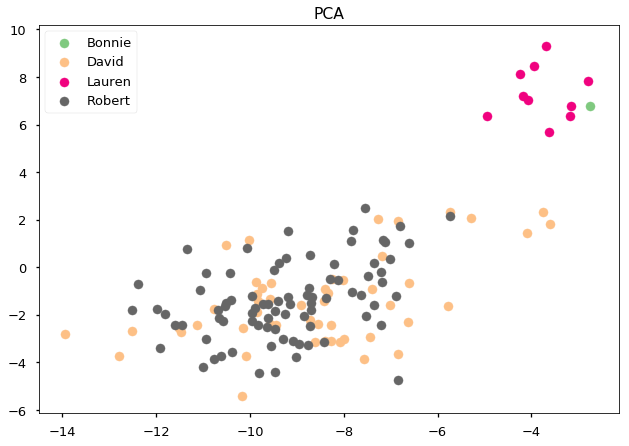

In [10]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['David', 'Lauren', 'Robert', 'Bonnie'])
do_plot(pca.transform(X), 'PCA', labels=labels)

In [14]:
# General word list
!wget https://raw.githubusercontent.com/IlyaSemenov/wikipedia-word-frequency/master/results/enwiki-20150602-words-frequency.txt
!git clone https://github.com/PrincetonML/SIF
    
# Gender word lists
!git clone https://github.com/uclanlp/gn_glove
!git clone https://github.com/uclanlp/corefBias
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/female.txt
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/male.txt
    
# our code for debiasing -- also includes word lists    
!git clone https://github.com/jsedoc/ConceptorDebias

--2019-03-04 23:23:13--  https://raw.githubusercontent.com/IlyaSemenov/wikipedia-word-frequency/master/results/enwiki-20150602-words-frequency.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23741395 (23M) [text/plain]
Saving to: ‘enwiki-20150602-words-frequency.txt’

enwiki-20150602-wor 100%[===================>]  22.64M   112MB/s    in 0.2s    

2019-03-04 23:23:15 (112 MB/s) - ‘enwiki-20150602-words-frequency.txt’ saved [23741395/23741395]

Cloning into 'SIF'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 2.80 MiB | 2.51 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Cloning into 'gn_glove'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 

In [12]:
from ConceptorDebias.load_word_lists import *
#from ConceptorDebias.plot_pc import *
from ConceptorDebias.conceptor_fxns import *

In [0]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
#negC, newX, R = post_process_cn_matrix(embeddings.T)

In [13]:
from ConceptorDebias.load_word_lists import *

gender_list_pronouns = WEATLists.W_7_Male_terms + WEATLists.W_7_Female_terms + WEATLists.W_8_Male_terms + WEATLists.W_8_Female_terms
gender_list_pronouns = list(set(gender_list_pronouns))

gender_list_extended = male_vino_extra + female_vino_extra + male_gnGlove + female_gnGlove
gender_list_extended = list(set(gender_list_extended))

gender_list_propernouns = male_cmu + female_cmu
gender_list_propernouns = list(set(gender_list_propernouns))

gender_list_all = gender_list_pronouns + gender_list_extended + gender_list_propernouns
gender_list_all = list(set(gender_list_all))

race_list = WEATLists.W_3_Unused_full_list_European_American_names + WEATLists.W_3_European_American_names + WEATLists.W_3_Unused_full_list_African_American_names + WEATLists.W_3_African_American_names + WEATLists.W_4_Unused_full_list_European_American_names + WEATLists.W_4_European_American_names + WEATLists.W_4_Unused_full_list_African_American_names + WEATLists.W_4_African_American_names + WEATLists.W_5_Unused_full_list_European_American_names + WEATLists.W_5_European_American_names + WEATLists.W_5_Unused_full_list_African_American_names + WEATLists.W_5_African_American_names
race_list = list(set(race_list))

(8654, 2) ['executive', 'he', 'relatives', 'salary', 'she', 'wedding'] 6 [[0.498  0.7882 0.498  1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [1.     1.     0.6    1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-10 04:27:12,315 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-10 04:27:12,358 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-10 04:27:12,383 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mappin

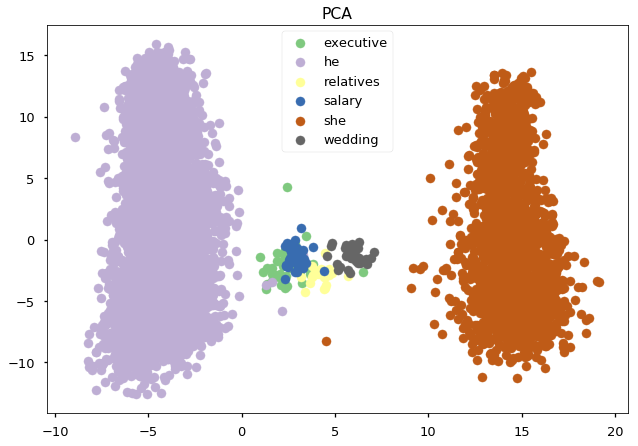

starting...
(4096, 8515)
R calculated
C calculated
negC calculated
(8515, 4096)
(8654, 2) ['executive', 'he', 'relatives', 'salary', 'she', 'wedding'] 6 [[0.498  0.7882 0.498  1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [1.     1.     0.6    1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-03-10 04:27:44,830 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-10 04:27:44,874 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-03-10 04:27:44,901 'c' argument looks lik

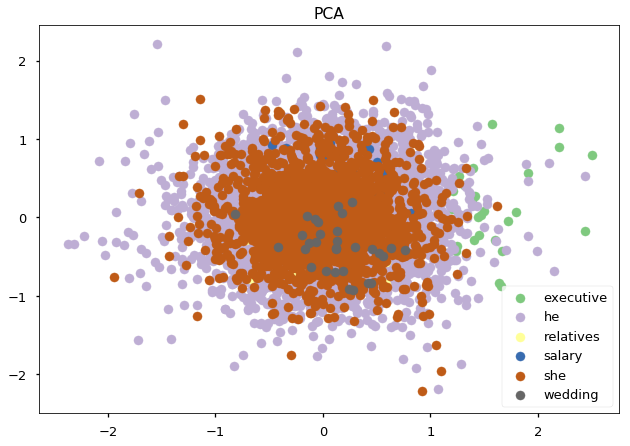

In [34]:
AB, AB_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['he', 'she'])
XY, XY_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['wedding', 'relatives','executive', 'salary', 'he', 'she'])#WEATLists.W_6_Career + WEATLists.W_6_Family)

pca = PCA(n_components=2)
pca.fit(AB)
do_plot(pca.transform(XY), 'PCA', labels=XY_labels)


Z = np.matrix(AB)
L = np.matrix(XY)
GnegC, GnewX, GR = post_process_cn_matrix(Z.T)

pca.fit(GnewX)
do_plot(pca.transform((GnegC*L.T).T), 'PCA', labels=XY_labels)


In [28]:
print(WEATLists.W_6_Career)
print(WEATLists.W_6_Family)

['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']
['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']


(586, 2) ['aunt', 'boy', 'brother', 'daughter', 'father', 'female', 'girl', 'grandfather', 'grandmother', 'he', 'her', 'hers', 'him', 'his', 'male', 'man', 'mother', 'she', 'sister', 'son', 'uncle', 'woman'] 22 [[0.498  0.7882 0.498  1.    ]
 [0.498  0.7882 0.498  1.    ]
 [0.498  0.7882 0.498  1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [1.     1.     0.6    1.    ]
 [1.     1.     0.6    1.    ]
 [1.     1.     0.6    1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.4    0.4    0.4    1.    ]
 [0.4    0.4    0.4    1.    ]
 [0.4    0.4    0.4    1.    ]]


IndexError: index 587 is out of bounds for axis 0 with size 586

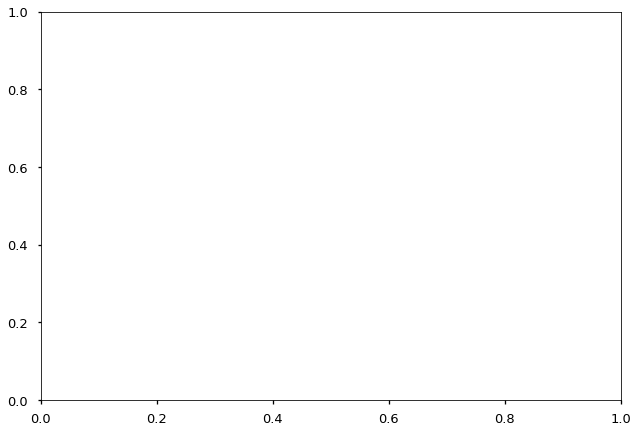

In [19]:
pca = PCA(n_components=2)
pca.fit(AB)
do_plot(pca.transform(AB), 'PCA', labels=labels)

#Z = np.matrix(AB)
#GnegC, GnewX, GR = post_process_cn_matrix(Z.T)
#pca.fit(GnewX)
#do_plot(pca.transform(GnegC*XY), 'PCA', labels=labels)

In [15]:
X2 = np.matrix(X)

In [16]:
GnegC, GnewX, GR = post_process_cn_matrix(X2.T)

starting...
(4096, 23068)
R calculated
C calculated
negC calculated
(23068, 4096)


In [37]:
import pickle
pickle.dump({'GnegC':GnegC, 'GnewX':GnewX, 'GR':GR, 'words':gender_list_pronouns}, open('bert_gender_list.pkl','wb'))

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 55390, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
tokens = {}
for i,l in enumerate(labels):
  if l not in tokens:
    tokens[l] = []
  tokens[l].append(X[i])
    


In [0]:
word_types = []
for i,w in enumerate(gender_list_pronouns):
  word_types.append(np.average(tokens[gender_list_pronouns[i]],0).shape)
word_types = np.matrix(word_types)

In [0]:
pickle.dump({'GnegC':GnegC, 'type_embedings':word_types, 'words':gender_list_pronouns}, open('bert_gender_list.pkl','wb'))

In [54]:
from google.colab import files
files.download('bert_gender_list.pkl')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 45344, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
!bzip2 bert_gender_list.pkl

In [0]:
# 1. Authenticate.
from google.colab import auth
auth.authenticate_user()

In [66]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3', cache_discovery=False)
#discover.build(api, version, http=http, cache_discovery=False)

2019-03-05 00:55:46,104 No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable


In [0]:
# Upload the file to Drive. See:
#
# https://developers.google.com/drive/v3/reference/files/create
# https://developers.google.com/drive/v3/web/manage-uploads
from googleapiclient.http import MediaFileUpload

In [0]:
lists = [gender_list_pronouns, gender_list_extended, gender_list_propernouns, gender_list_all, race_list]
list_names = ['gender_list_pronouns', 'gender_list_extended', 'gender_list_propernouns', 'gender_list_all', 'race_list']


In [98]:
for j,at_list in enumerate(lists):
    print(at_list)
    if len(at_list) > 300:
        at_list = np.random.choice(at_list, 300, replace=False)
    X, labels, _ = pick_embeddings(brown_corpus, brown_embs, at_list)
    X2 = np.matrix(X)
    GnegC, GnewX, GR = post_process_cn_matrix(X2.T)
    tokens = {}
    for i,l in enumerate(labels):
      if l not in tokens:
        tokens[l] = []
      tokens[l].append(X[i])
    type_list = list(tokens.keys())
    word_types = []
    for i,w in enumerate(type_list):
      word_types.append(np.average(tokens[type_list[i]],0))
    word_types = np.matrix(word_types)
    pickle.dump({'GnegC':GnegC, 'type_embedings':word_types, 'words':type_list}, open('big_bert_'+list_names[j]+'.pkl','wb'))

['uncle', 'grandmother', 'sister', 'his', 'father', 'female', 'male', 'man', 'aunt', 'mother', 'daughter', 'brother', 'boy', 'woman', 'he', 'son', 'grandfather', 'she', 'hers', 'him', 'her', 'girl']
starting...
(4096, 5619)
R calculated
C calculated
negC calculated
(5619, 4096)
['councilmen', 'mama', 'prince', 'wife', 'doe', 'strongwoman', 'barons', 'hosts', 'suitors', 'handyman', 'bachelorette', 'cowgirls', 'goddess', 'abbesses', 'nieces', 'godess', 'son', 'bellboys', 'widower', 'congressman', 'host', 'airwoman', 'mrs.', 'councilman', 'emperors', 'maidservant', 'hostess', 'headmaster', 'males', 'gay', "seamstress'", 'spokeswoman', 'househusbands', 'gents', 'baroness', 'sorcerers', 'godfather', 'gals', 'womb', 'beards', 'sorcerer', 'headmistresses', 'countrymen', 'mom', 'grandfather', 'testosterone', 'congresswoman', 'divo', 'lads', 'spokesman', 'vagina', 'lad', 'girl', 'busboys', 'priestess', 'masseur', 'sororities', 'his', 'prostatic_utricle', 'gelding', 'cowboy', 'mothers', 'lass', 

In [104]:
#!ls -l bert
#!mkdir bert
#!mv elmo*pkl bert
#!rm bert/*
!rm bert_conceptors.tar.bz2
!mv big_bert*pkl bert/
!tar cvfj bert_conceptors.tar.bz2 bert

bert/
bert/bert_WEFAT_1_Male_attributes.pkl
bert/big_bert_gender_list_propernouns.pkl
bert/bert_W_5_African_American_names.pkl
bert/bert_W_2_Weapons.pkl
bert/bert_W_1_Pleasant.pkl
bert/bert_W_5_European_American_names.pkl
bert/bert_W_5_Unpleasant.pkl
bert/bert_W_6_Male_names.pkl
bert/big_bert_gender_list_all.pkl
bert/bert_W_10_Pleasant.pkl
bert/bert_W_1_Insects.pkl
bert/bert_W_5_Unused_full_list_European_American_names.pkl
bert/bert_W_10_Young_peoples_names.pkl
bert/bert_W_6_Female_names.pkl
bert/bert_W_9_Physical_disease.pkl
bert/bert_W_7_Female_terms.pkl
bert/big_bert_gender_list_pronouns.pkl
bert/bert_W_3_Unused_full_list_European_American_names.pkl
bert/bert_W_4_Unused_full_list_African_American_names.pkl
bert/bert_W_8_Male_terms.pkl
bert/bert_WEFAT_2_Androgynous_Names.pkl
bert/bert_WEFAT_1_Careers.pkl
bert/bert_W_9_Temporary.pkl
bert/bert_W_2_Unpleasant.pkl
bert/bert_WEFAT_1_Female_attributes.pkl
bert/bert_W_2_Instruments.pkl
bert/bert_W_7_Male_terms.pkl
bert/bert_W_3_Unpleasant.p

In [0]:
association_lists = []
for x in dir(WEATLists):
    if "W_" in x or 'WE' in x:
        association_lists.append(x)

In [0]:
for j,as_list_name in enumerate(association_lists):
    as_list = eval('WEATLists.' + association_lists[j])
    X, labels, _ = pick_embeddings(brown_corpus, brown_embs, as_list)
    tokens = {}
    for i,l in enumerate(labels):
      if l not in tokens:
        tokens[l] = []
      tokens[l].append(X[i])
    type_list = list(tokens.keys())
    word_types = []
    for i,w in enumerate(type_list):
      word_types.append(np.average(tokens[type_list[i]],0))
    word_types = np.matrix(word_types)
    pickle.dump({'type_embedings':word_types, 'words':type_list}, open('bert_'+as_list_name+'.pkl','wb'))

In [105]:
# application/bzip2
file_metadata = {
  'name': 'bert_conceptors.tar.bz2',
#  'mimeType': 'text/plain'
  'mimeType': 'application/bzip2'
}
media = MediaFileUpload('/content/bert_conceptors.tar.bz2', 
#                        mimetype='text/plain',
                         mimetype='application/bzip2',
                         resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1JyRVLZb7IdiMGGwPfXuA1f-CmCvxHDXx


In [109]:
eval('WEATLists.' + association_lists[j])

['impermanent',
 'unstable',
 'variable',
 'fleeting',
 'short-term',
 'brief',
 'occasional']

In [0]:
data = pickle.load(open('bert/big_bert_gender_list_propernouns.pkl','rb'))

In [111]:
data['words']

['James',
 'Dean',
 'Duffy',
 'Patience',
 'Jerry',
 'Lenny',
 'Leo',
 'Tommy',
 'Gary',
 'Francis',
 'Chase',
 'Wright',
 'Butler',
 'Christi',
 'Monte',
 'Eleanor',
 'Otis',
 'Winston',
 'Claude',
 'Bess',
 'Kaiser',
 'Birdie',
 'Shelby',
 'Reed',
 'Lay',
 'Caron',
 'Henri',
 'Irina',
 'Madonna',
 'Nikita',
 'Adam',
 'Leopold',
 'Luther',
 'Ellis',
 'Rock',
 'Robby',
 'Von',
 'Everett',
 'Ventura',
 'Faith',
 'Emerson',
 'Catherine',
 'Fidelity',
 'Percy',
 'Sherry',
 'Alf',
 'Bela']

In [0]:
sentiment_list = ['']